In [1]:
import pandas as pd

In [2]:
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')

In [3]:
train['Label'] = 'Train'
test['Label'] = 'Test'

together = pd.concat([train, test])
together = (
    together
    .drop(['Ticket', 'Embarked', 'Cabin'], axis='columns')
    .set_index(pd.Index(range(len(together.index))))
)

together

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Train
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,Test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,Test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,Test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,Test


In [4]:
missing = pd.DataFrame(index=together.columns)
number_of_entries = len(together.index)

for col in together.columns:
    null_count = together[col].isnull().sum()
    missing.loc[col, 'Total'] = null_count
    missing.loc[col, 'Percent'] = null_count / number_of_entries * 100

missing = missing.sort_values('Total', ascending=False)

missing


,Total,Percent
Survived,418.0,31.932773
Age,263.0,20.091673
Fare,1.0,0.076394
PassengerId,0.0,0.000000
Pclass,0.0,0.000000
Name,0.0,0.000000
Sex,0.0,0.000000
SibSp,0.0,0.000000
Parch,0.0,0.000000
Label,0.0,0.000000


In [5]:
df_copy = together.copy()

df_copy.loc[df_copy.Age.isnull(), 'Age'] = df_copy.Age.mean()

df_copy['Fare'].fillna(df_copy.Fare.median(), inplace = True)

print(df_copy.Age.mean())
print(df_copy.Fare.median())
df_copy

29.881137667304014
14.4542


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,Train
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,8.0500,Test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,108.9000,Test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,7.2500,Test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,8.0500,Test


In [6]:
group = 'Pclass'

df_group = together.groupby(group)

survived = (
    df_group['Survived']
    .mean()
    .sort_values(ascending=False)
    .round(2)
    .to_frame()
    .reset_index()
)

survived

,Pclass,Survived
0,1,0.63
1,2,0.47
2,3,0.24


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (24, 6) # redefine the default size of the plots
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('ggplot')

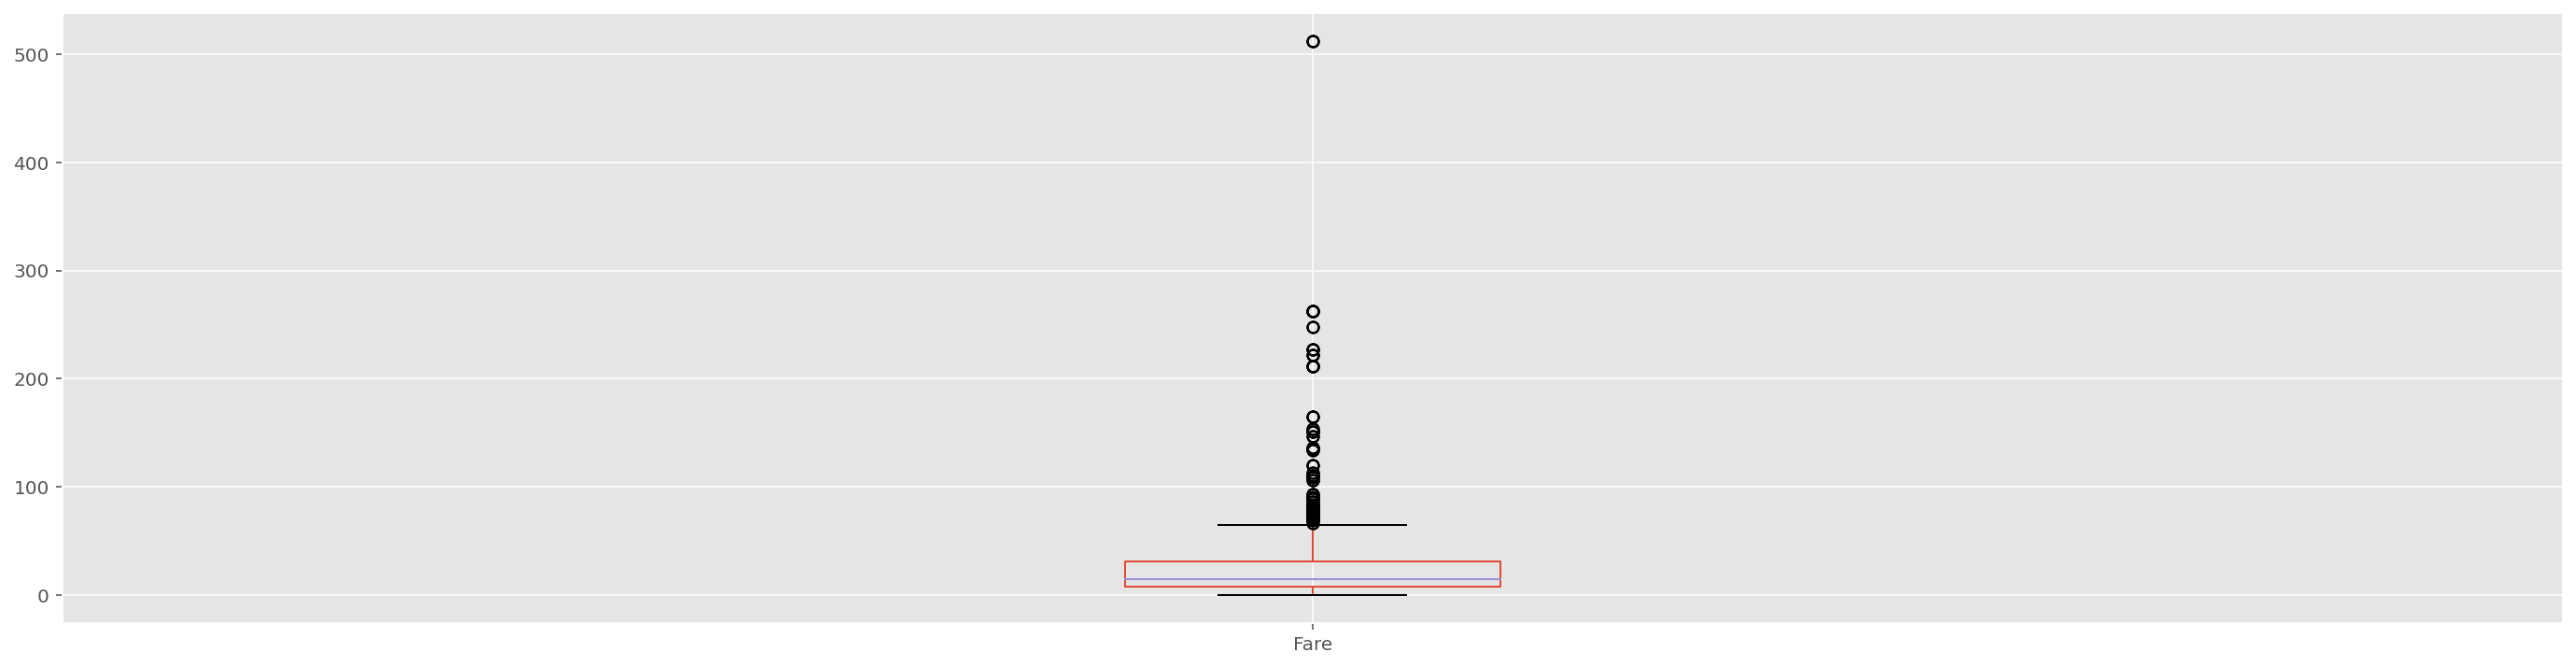

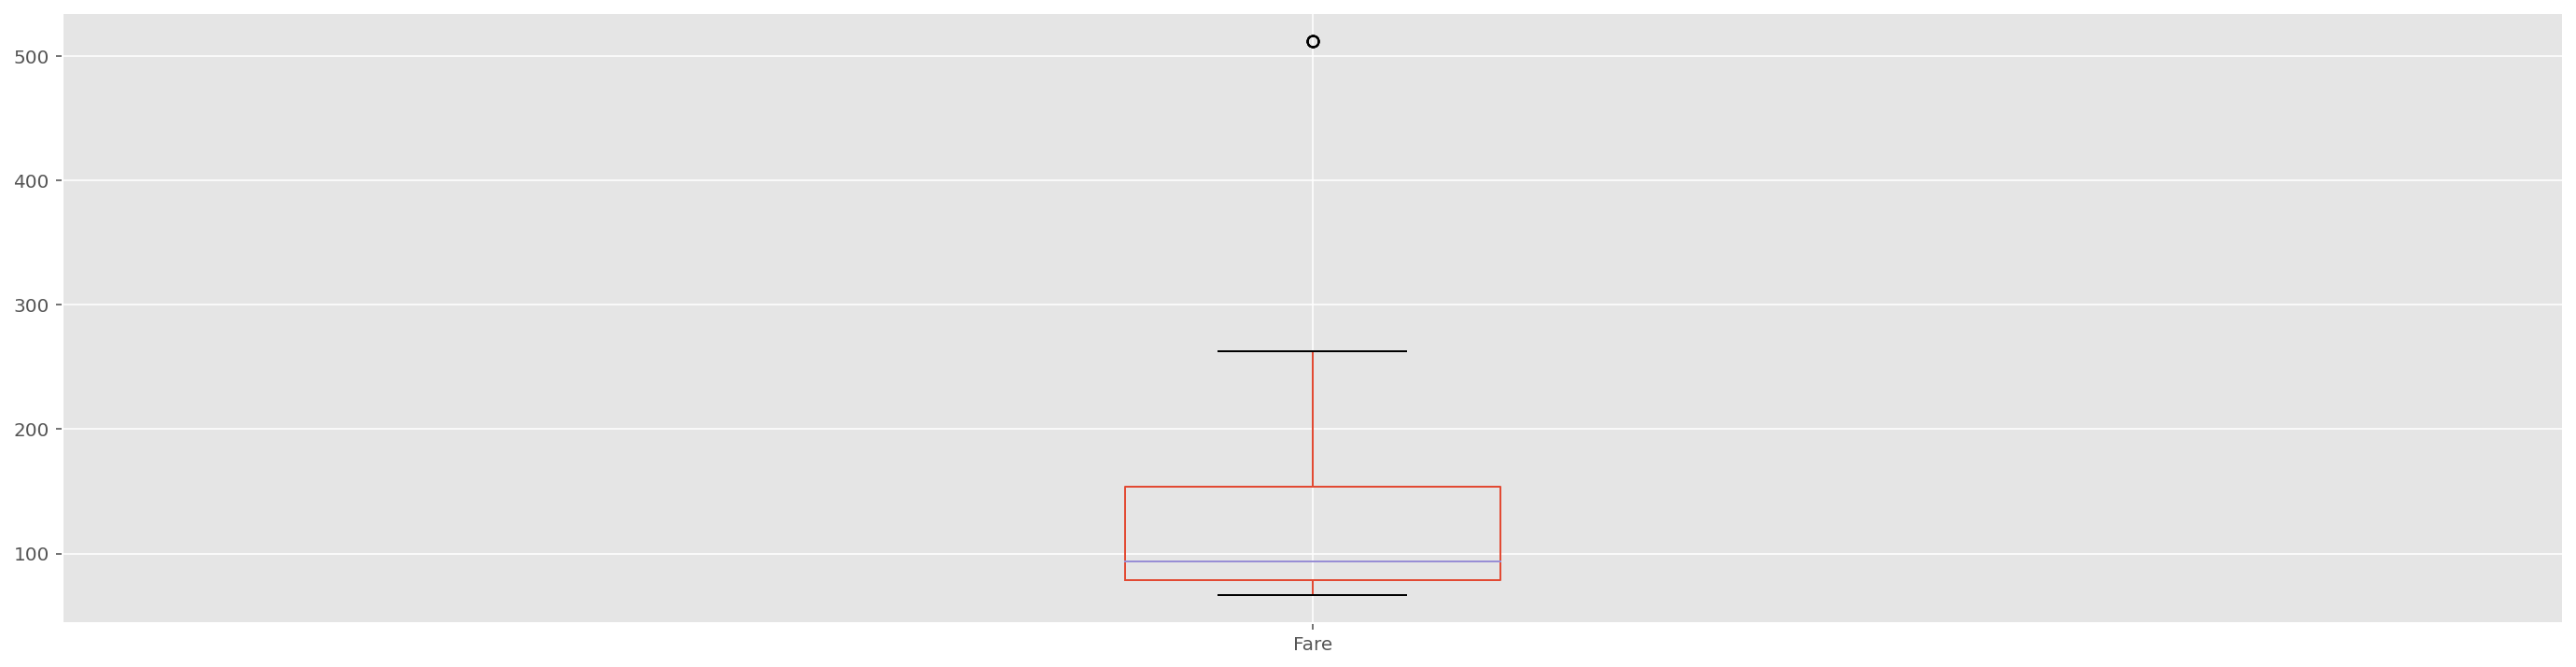

171
Ward, Miss. Anna


In [8]:
together['Fare'].plot.box();
plt.show()

quartile3 = together.Fare.quantile(0.75)
quartile1 = together.Fare.quantile(0.25)
iqr = quartile3 - quartile1

is_fare_outlier_condition = (
    (together.Fare < quartile1 - 1.5 * iqr) |
    (together.Fare > quartile3 + 1.5 * iqr)
)

res = together[is_fare_outlier_condition]

res['Fare'].plot.box();
plt.show()

print(res['Fare'].count())
print(res.loc[res['Fare'].idxmax(), 'Name'])

In [9]:
def min_max_scale(x: pd.Series) -> pd.Series:
    minimum = x.min()
    maximum = x.max()
    
    return (x - minimum) / (maximum - minimum)

col_normalise = together.copy()

col = 'Fare'

col_normalise[col] = col_normalise.groupby('Pclass')[col].apply(min_max_scale)

col_normalise

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,0.104242,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,0.139136,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0.113947,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,0.103644,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,0.115744,Train
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,0.115744,Test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,0.212559,Test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,0.104242,Test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,0.115744,Test


In [10]:
df_new = together.copy()

df_new['Sex'] = df_new['Sex'].replace(['female', 'male'], [1, 0])

import numpy as np
df_new['Age_log'] = np.log(df_new.Age)

df_new['Fare_scaled'] = df_new['Fare'] - np.mean(df_new['Fare'])
df_new['Fare_scaled'] /= np.std(df_new['Fare_scaled']) 

df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Label,Age_log,Fare_scaled
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,Train,3.091042,-0.503402
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,Train,3.637586,0.734222
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,Train,3.258097,-0.490356
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,Train,3.555348,0.382778
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,Train,3.555348,-0.487940
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,8.0500,Test,NaN,-0.487940
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,Test,3.663562,1.461271
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,Test,3.650658,-0.503402
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,8.0500,Test,NaN,-0.487940


In [22]:
df = together
n_interval, age, sex = 20, 150, 'male'


df.loc[df.Age.isnull(), 'Age'] = df.Age.mean()

val = (df.Age.max() - df.Age.min()) / n_interval
lower = df.Age.min() - 0.03
upper = lower + val + 0.03

while age <= lower or age > upper:
    lower = upper
    upper += val

lower, upper

df.loc[(df.Age > lower) & (df.Age <= upper), 'AgeInterval'] = f'({lower}, {upper})'

df_group = df.groupby(['AgeInterval', 'Sex'])

survived = df_group['Survived'].mean().to_frame().reset_index()

survived[survived.Sex == sex].Survived.empty

True